In [1]:
from sklearn.model_selection import train_test_split


In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
ave_file = r'C:\Users\ААА\Desktop\bmw.csv'
df = pd.read_csv(ave_file)

In [4]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


In [5]:
df.info() #здесь видно, что данные чистые и структурированные

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   tax           10781 non-null  int64  
 7   mpg           10781 non-null  float64
 8   engineSize    10781 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 758.2+ KB


In [6]:
model = df.loc[: , "model"].values
year = df.loc[: , "year"].values
price = df.loc[: , "price"].values
transmission = df.loc[: , "transmission"].values
mileage = df.loc[: , "mileage"].values
fuelType = df.loc[: , "fuelType"].values
tax = df.loc[: , "tax"].values
mpg = df.loc[: , "mpg"].values
engineSize = df.loc[: , "engineSize"].values

In [7]:
transmission

array(['Automatic', 'Automatic', 'Automatic', ..., 'Manual', 'Automatic',
       'Automatic'], dtype=object)

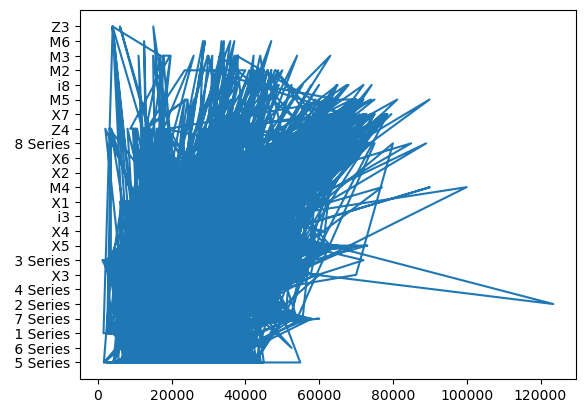

In [8]:
plt.plot(price, model)

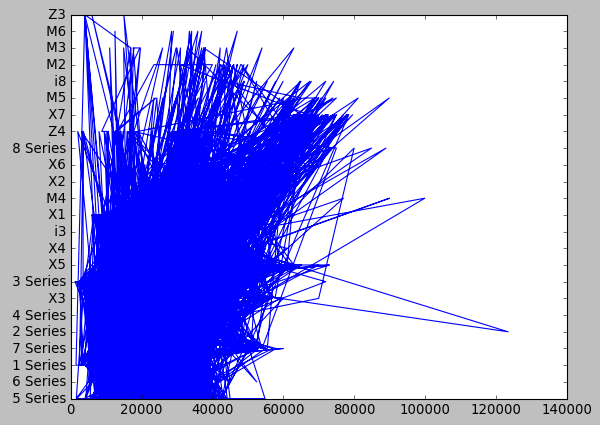

In [9]:
plt. style.use('classic')
plt.plot(price, model)

Text(0.5, 0.98, '')

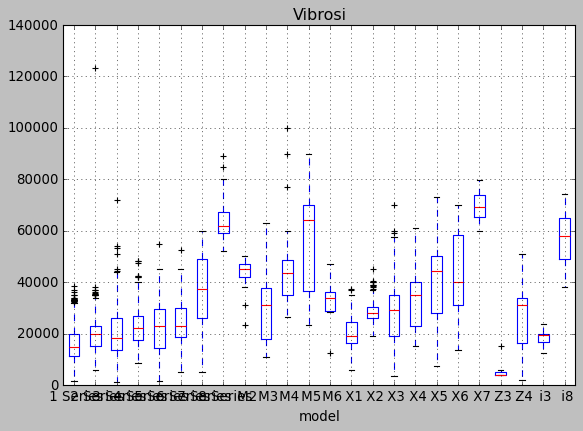

In [10]:
df.boxplot(column = 'price', by = 'model') #здесь могут быть заметны выбросы, но надо понимать, что цена строится не только из модельного ряда
plt.title("Vibrosi")
plt.suptitle("")

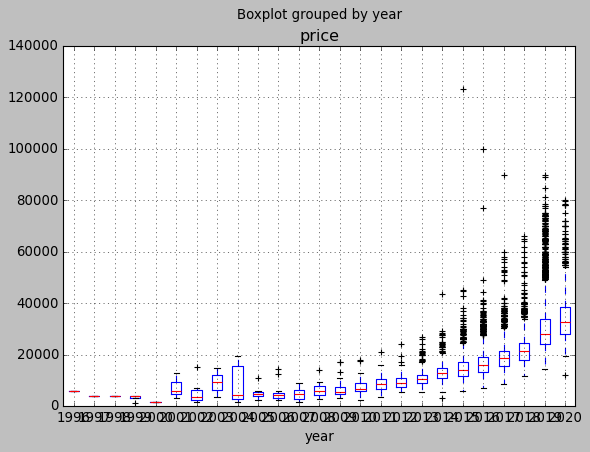

In [11]:
df.boxplot(column='price', by='year')
plt.show()

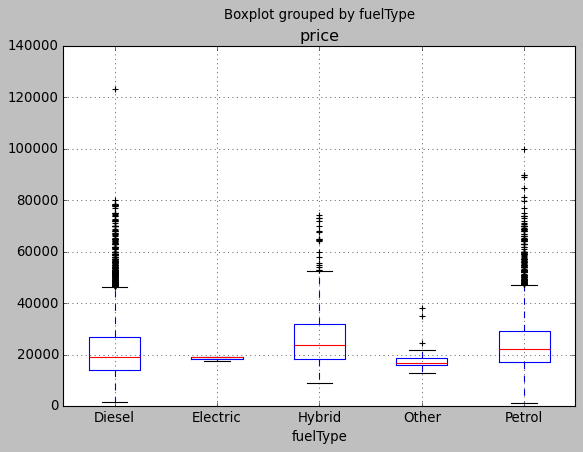

In [12]:
df.boxplot(column='price', by='fuelType')
plt.show()

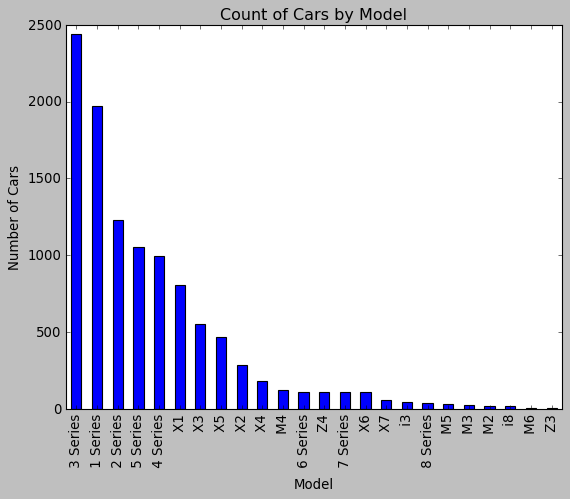

In [13]:
df['model'].value_counts().plot(kind='bar')
plt.xlabel('Model')
plt.ylabel('Number of Cars')
plt.title('Count of Cars by Model')
plt.show()

In [14]:
#Здесь можно увидеть, что на некоторые модели машин будет сложно предсказать цену, так как данных мало

In [15]:
X = df.drop('price', axis=1)  # Все столбцы, кроме цены
y = df['price']  # Столбец с ценами

#randon_state мы установили на уровне 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
from sklearn.metrics import mean_absolute_error

y_pred_baseline = [y_train.mean()] * len(y_test)  # Предсказываем среднюю цену для всех автомобилей в тестовой выборке
mae_baseline = mean_absolute_error(y_test, y_pred_baseline)

print(f"MAE baseline (предсказание средней цены): {mae_baseline:.2f}")

MAE baseline (предсказание средней цены): 8335.22


In [17]:
# Попробуем сделать в качестве бейзлайн модельки линейную регрессию..(как настоящий прграммист использую ресурсы сети Интернет..)
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Определяем категориальные столбцы
categorical_cols = ['transmission', 'fuelType', 'model']

# Создаем pipeline для предобработки и обучения модели
# Для кодирования категориальных переменных используется one-hot encoding, так как он преобразует категории в числовые значения, подходящие для линейной регрессии
# Линейная регрессия является простой и интерпретируемой моделью, которая подходит в качестве baseline для задачи регрессии
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', 'passthrough', ['mileage', 'tax', 'mpg', 'engineSize', 'year'])
    ]
)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Обучаем модель
pipeline.fit(X_train, y_train)

# Предсказываем значения для тестовой выборки
y_pred = pipeline.predict(X_test)

# Оцениваем качество модели
mae_linear_regression = mean_absolute_error(y_test, y_pred)

print(f"MAE линейной регрессии: {mae_linear_regression:.2f}")

MAE линейной регрессии: 3167.69


In [18]:
df.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

In [19]:
# UPD: Забыл колонку с годом добавить, стало MAE 3167.7 
# MAE линейной регрессии: 3792.57. Результат очень плохой, так как это цена в фунтах.
# Но это на то и бейзлайн
# RapidMiner посоветовал использовать градиентный бустинг (он сам перебрал все модели,хочу вставить инфу, как у него получилось в автоматическом режиме)

In [20]:
from sklearn.ensemble import GradientBoostingRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

categorical_cols = ['transmission', 'fuelType', 'model']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', 'passthrough', ['mileage', 'tax', 'mpg', 'engineSize', 'year'])
    ]
)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', GradientBoostingRegressor(random_state=42))
])

In [21]:
pipeline.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = pipeline.predict(X_test)

# Оценка MAE
mae_gb = mean_absolute_error(y_test, y_pred)
print(f"MAE градиентного бустинга: {mae_gb:.2f}")

MAE градиентного бустинга: 2064.92


In [22]:
#Оценка важности разных признаков далле

feature_importances = pipeline['model'].feature_importances_

# Получение имен столбцов (с учетом one-hot encoding)
cat_encoder = pipeline['preprocessor'].named_transformers_['cat']
cat_feature_names = cat_encoder.get_feature_names_out(categorical_cols)

# Определение списка числовых столбцов
num_cols = ['mileage', 'tax', 'mpg', 'engineSize', 'year'] 

# Объединение имен признаков
feature_names = np.concatenate([cat_feature_names, num_cols])


feature_importance_df = pd.DataFrame({'feature': feature_names, 
                                     'importance': feature_importances})

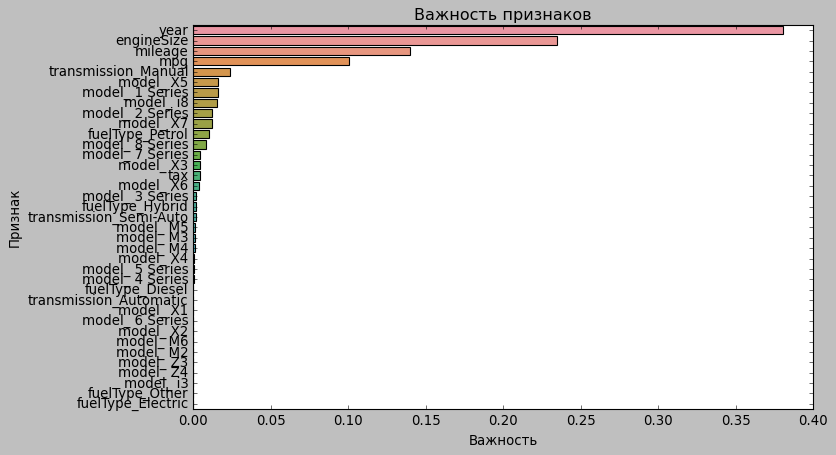

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Важность признаков')
plt.xlabel('Важность')
plt.ylabel('Признак')
plt.show()


In [24]:
# В 3 домашнем задании попробую отказаться от метода one-hook encoding и поиграюсь с гиперпараметрами
#Rapid Miner выделил основными признаками модель -> год -> пробег
# Но я боюсь, что там могло произойти переобучение. Попробую deep learning

In [25]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


categorical_cols = ['transmission', 'fuelType', 'model']
numerical_cols = ['mileage', 'tax', 'mpg', 'engineSize', 'year']


cat_encoder = OneHotEncoder(handle_unknown='ignore')
X_train_cat = cat_encoder.fit_transform(X_train[categorical_cols]).toarray()
X_test_cat = cat_encoder.transform(X_test[categorical_cols]).toarray()


num_scaler = StandardScaler()
X_train_num = num_scaler.fit_transform(X_train[numerical_cols])
X_test_num = num_scaler.transform(X_test[numerical_cols])


X_train_deep = np.concatenate([X_train_cat, X_train_num], axis=1)
X_test_deep = np.concatenate([X_test_cat, X_test_num], axis=1)

In [26]:
# Определение модели
model = Sequential([
    InputLayer(input_shape=(X_train_deep.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1) 
])


model.compile(loss='mse', optimizer='adam', metrics=['mae'])


model.fit(X_train_deep, y_train, epochs=100, validation_data=(X_test_deep, y_test))

Epoch 1/100
270/270 [==============================] - 1s 2ms/step - loss: 620613056.0000 - mae: 22208.3262 - val_loss: 551613056.0000 - val_mae: 20926.2480
Epoch 2/100
270/270 [==============================] - 0s 1ms/step - loss: 333593984.0000 - mae: 15387.4844 - val_loss: 131617720.0000 - val_mae: 8736.5869
Epoch 3/100
270/270 [==============================] - 0s 1ms/step - loss: 72322320.0000 - mae: 5767.4883 - val_loss: 51477656.0000 - val_mae: 4913.9595
Epoch 4/100
270/270 [==============================] - 0s 1ms/step - loss: 45959592.0000 - mae: 4496.2339 - val_loss: 42764052.0000 - val_mae: 4364.3623
Epoch 5/100
270/270 [==============================] - 0s 1ms/step - loss: 39391676.0000 - mae: 4095.5352 - val_loss: 37842052.0000 - val_mae: 3999.8396
Epoch 6/100
270/270 [==============================] - 0s 1ms/step - loss: 35194188.0000 - mae: 3814.9143 - val_loss: 34292088.0000 - val_mae: 3809.8506
Epoch 7/100
270/270 [==============================] - 0s 1ms/step - loss: 

In [27]:
_, mae = model.evaluate(X_test_deep, y_test, verbose=0)
print(f"MAE: {mae:.2f}")

MAE: 1948.77


Epoch 1/100
270/270 [==============================] - 0s 1ms/step - loss: 9104631.0000 - mae: 1850.5825 - val_loss: 10853940.0000 - val_mae: 1984.2156
Epoch 2/100
270/270 [==============================] - 0s 1ms/step - loss: 9085254.0000 - mae: 1851.5132 - val_loss: 10730211.0000 - val_mae: 1956.5902
Epoch 3/100
270/270 [==============================] - 0s 1ms/step - loss: 9063042.0000 - mae: 1846.2025 - val_loss: 10727122.0000 - val_mae: 1937.9674
Epoch 4/100
270/270 [==============================] - 0s 1ms/step - loss: 9050725.0000 - mae: 1847.7208 - val_loss: 10677445.0000 - val_mae: 1947.4182
Epoch 5/100
270/270 [==============================] - 0s 1ms/step - loss: 9049235.0000 - mae: 1842.2307 - val_loss: 10620793.0000 - val_mae: 1936.0322
Epoch 6/100
270/270 [==============================] - 0s 1ms/step - loss: 9033050.0000 - mae: 1841.1566 - val_loss: 10639462.0000 - val_mae: 1936.1626
Epoch 7/100
270/270 [==============================] - 0s 1ms/step - loss: 9016336.0000 

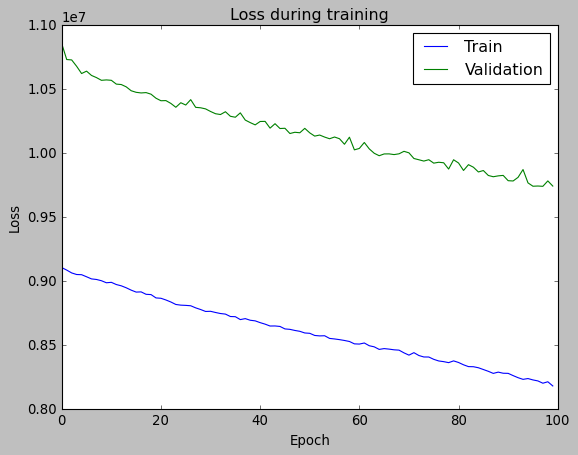

In [28]:
history = model.fit(X_train_deep, y_train, epochs=100, validation_data=(X_test_deep, y_test))  


# Визуализация loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss during training')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

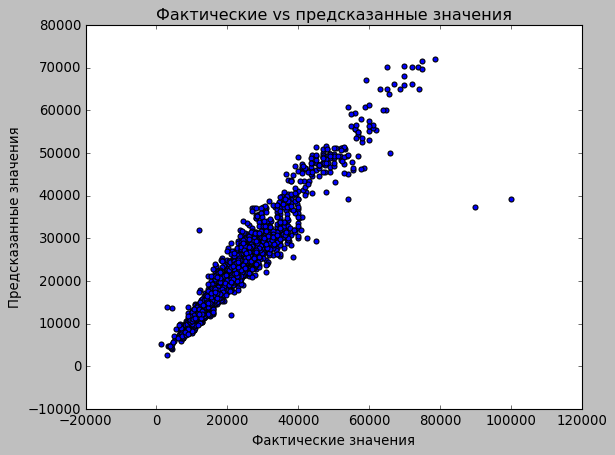

In [29]:
plt.scatter(y_test, y_pred)
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Фактические vs предсказанные значения')
plt.show()

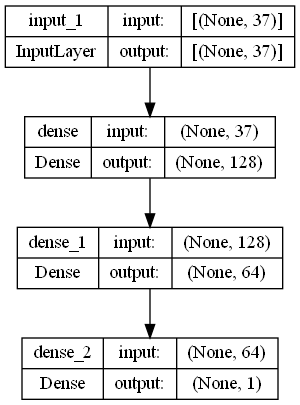

In [30]:
from tensorflow import keras

keras.utils.plot_model(model, show_shapes=True)

In [31]:
#Немножко сначала начну, оптимизирую модель DEep Learning
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import optuna

M:\Anaconda\envs\aaa\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [32]:
def objective(trial):
    # Гиперпараметры для подбора
    n_layers = trial.suggest_int('n_layers', 1, 3)
    n_units = trial.suggest_int('n_units', 32, 256, step=32)
    dropout_rate = trial.suggest_float('dropout_rate', 0.0, 0.5)
    activation = trial.suggest_categorical('activation', ['relu', 'tanh'])

    # Построение модели
    model = Sequential()
    model.add(InputLayer(input_shape=(X_train_deep.shape[1],)))

    for i in range(n_layers):
        model.add(Dense(n_units, activation=activation))
        model.add(Dropout(dropout_rate))

    model.add(Dense(1))  # Выходной слой

    # Компиляция модели
    model.compile(loss='mse', optimizer='adam', metrics=['mae'])

    # Обучение модели
    history = model.fit(X_train_deep, y_train, epochs=50, validation_split=0.2)

    # Оценка MAE на валидационной выборке
    val_mae = np.min(history.history['val_mae'])
    return val_mae

In [33]:
study = optuna.create_study(direction='minimize')  # Минимизируем MAE
study.optimize(objective, n_trials=15)  # было 100 попыток, но результат почти нулевой, а грузит довольно долго

best_params = study.best_params
print(f"Лучшие параметры: {best_params}")

[I 2024-04-27 14:26:54,282] A new study created in memory with name: no-name-aa53e791-bd54-4631-92fb-6b50a6045dca


Epoch 1/50
216/216 [==============================] - 1s 2ms/step - loss: 637813568.0000 - mae: 22618.6465 - val_loss: 666789760.0000 - val_mae: 22792.4590
Epoch 2/50
216/216 [==============================] - 0s 1ms/step - loss: 635870912.0000 - mae: 22576.2734 - val_loss: 664799872.0000 - val_mae: 22747.0664
Epoch 3/50
216/216 [==============================] - 0s 1ms/step - loss: 634073856.0000 - mae: 22535.1602 - val_loss: 663148288.0000 - val_mae: 22709.9102
Epoch 4/50
216/216 [==============================] - 0s 1ms/step - loss: 632519872.0000 - mae: 22500.1289 - val_loss: 661661952.0000 - val_mae: 22676.8555
Epoch 5/50
216/216 [==============================] - 0s 1ms/step - loss: 631108672.0000 - mae: 22468.4844 - val_loss: 660263488.0000 - val_mae: 22645.8496
Epoch 6/50
216/216 [==============================] - 0s 1ms/step - loss: 629744384.0000 - mae: 22437.9648 - val_loss: 658913216.0000 - val_mae: 22615.9180
Epoch 7/50
216/216 [==============================] - 0s 1ms/ste

[I 2024-04-27 14:27:07,544] Trial 0 finished with value: 21406.505859375 and parameters: {'n_layers': 1, 'n_units': 128, 'dropout_rate': 0.3730062533796225, 'activation': 'tanh'}. Best is trial 0 with value: 21406.505859375.


Epoch 1/50
216/216 [==============================] - 1s 2ms/step - loss: 636512704.0000 - mae: 22588.4316 - val_loss: 665042752.0000 - val_mae: 22750.7891
Epoch 2/50
216/216 [==============================] - 0s 2ms/step - loss: 634017216.0000 - mae: 22532.7520 - val_loss: 662761792.0000 - val_mae: 22700.5938
Epoch 3/50
216/216 [==============================] - 0s 2ms/step - loss: 631798144.0000 - mae: 22483.4180 - val_loss: 660547136.0000 - val_mae: 22651.7656
Epoch 4/50
216/216 [==============================] - 0s 2ms/step - loss: 629609792.0000 - mae: 22434.7148 - val_loss: 658359360.0000 - val_mae: 22603.4219
Epoch 5/50
216/216 [==============================] - 0s 2ms/step - loss: 627446656.0000 - mae: 22386.5332 - val_loss: 656190208.0000 - val_mae: 22555.3906
Epoch 6/50
216/216 [==============================] - 0s 2ms/step - loss: 625318016.0000 - mae: 22338.8047 - val_loss: 654033728.0000 - val_mae: 22507.5273
Epoch 7/50
216/216 [==============================] - 0s 2ms/ste

[I 2024-04-27 14:27:25,811] Trial 1 finished with value: 20430.19921875 and parameters: {'n_layers': 2, 'n_units': 224, 'dropout_rate': 0.4399179877997037, 'activation': 'tanh'}. Best is trial 1 with value: 20430.19921875.


Epoch 1/50
216/216 [==============================] - 1s 3ms/step - loss: 296885504.0000 - mae: 12535.3076 - val_loss: 45443304.0000 - val_mae: 3854.0510
Epoch 2/50
216/216 [==============================] - 0s 2ms/step - loss: 26774430.0000 - mae: 3339.1360 - val_loss: 32105956.0000 - val_mae: 3197.4968
Epoch 3/50
216/216 [==============================] - 0s 2ms/step - loss: 20178182.0000 - mae: 2950.9407 - val_loss: 26709040.0000 - val_mae: 2793.5862
Epoch 4/50
216/216 [==============================] - 0s 2ms/step - loss: 17080758.0000 - mae: 2708.4558 - val_loss: 23055144.0000 - val_mae: 2538.0195
Epoch 5/50
216/216 [==============================] - 0s 2ms/step - loss: 14051671.0000 - mae: 2494.6216 - val_loss: 20200398.0000 - val_mae: 2363.0183
Epoch 6/50
216/216 [==============================] - 0s 2ms/step - loss: 12577469.0000 - mae: 2352.6016 - val_loss: 18201454.0000 - val_mae: 2217.8337
Epoch 7/50
216/216 [==============================] - 0s 2ms/step - loss: 11447885.000

[I 2024-04-27 14:27:46,441] Trial 2 finished with value: 1713.3399658203125 and parameters: {'n_layers': 3, 'n_units': 192, 'dropout_rate': 0.052367174651365256, 'activation': 'relu'}. Best is trial 2 with value: 1713.3399658203125.


Epoch 1/50
216/216 [==============================] - 1s 2ms/step - loss: 638079936.0000 - mae: 22623.7598 - val_loss: 667332992.0000 - val_mae: 22804.2441
Epoch 2/50
216/216 [==============================] - 0s 1ms/step - loss: 635992960.0000 - mae: 22584.8809 - val_loss: 664007104.0000 - val_mae: 22743.4023
Epoch 3/50
216/216 [==============================] - 0s 1ms/step - loss: 631553216.0000 - mae: 22502.6445 - val_loss: 658355264.0000 - val_mae: 22640.3086
Epoch 4/50
216/216 [==============================] - 0s 1ms/step - loss: 624939392.0000 - mae: 22380.3125 - val_loss: 650617920.0000 - val_mae: 22498.6328
Epoch 5/50
216/216 [==============================] - 0s 1ms/step - loss: 616296448.0000 - mae: 22219.8125 - val_loss: 640958336.0000 - val_mae: 22320.6914
Epoch 6/50
216/216 [==============================] - 0s 1ms/step - loss: 606031616.0000 - mae: 22026.7266 - val_loss: 629764672.0000 - val_mae: 22112.4688
Epoch 7/50
216/216 [==============================] - 0s 1ms/ste

[I 2024-04-27 14:27:58,593] Trial 3 finished with value: 5104.177734375 and parameters: {'n_layers': 1, 'n_units': 64, 'dropout_rate': 0.10592699313688725, 'activation': 'relu'}. Best is trial 2 with value: 1713.3399658203125.


Epoch 1/50
216/216 [==============================] - 1s 2ms/step - loss: 637764928.0000 - mae: 22618.0703 - val_loss: 666332672.0000 - val_mae: 22786.2422
Epoch 2/50
216/216 [==============================] - 0s 1ms/step - loss: 633439360.0000 - mae: 22538.4238 - val_loss: 659347264.0000 - val_mae: 22659.1094
Epoch 3/50
216/216 [==============================] - 0s 1ms/step - loss: 624127296.0000 - mae: 22366.1543 - val_loss: 647603264.0000 - val_mae: 22443.8984
Epoch 4/50
216/216 [==============================] - 0s 1ms/step - loss: 610503936.0000 - mae: 22111.3848 - val_loss: 631713664.0000 - val_mae: 22149.2402
Epoch 5/50
216/216 [==============================] - 0s 1ms/step - loss: 592909760.0000 - mae: 21777.9844 - val_loss: 612303552.0000 - val_mae: 21783.5195
Epoch 6/50
216/216 [==============================] - 0s 1ms/step - loss: 572249152.0000 - mae: 21378.6484 - val_loss: 589906048.0000 - val_mae: 21352.9258
Epoch 7/50
216/216 [==============================] - 0s 1ms/ste

[I 2024-04-27 14:28:11,881] Trial 4 finished with value: 4379.03369140625 and parameters: {'n_layers': 1, 'n_units': 128, 'dropout_rate': 0.21794681941526678, 'activation': 'relu'}. Best is trial 2 with value: 1713.3399658203125.


Epoch 1/50
216/216 [==============================] - 1s 2ms/step - loss: 583013440.0000 - mae: 21488.1504 - val_loss: 429936448.0000 - val_mae: 17793.3613
Epoch 2/50
216/216 [==============================] - 0s 2ms/step - loss: 155640432.0000 - mae: 9177.9658 - val_loss: 66066524.0000 - val_mae: 5062.9658
Epoch 3/50
216/216 [==============================] - 0s 2ms/step - loss: 46423484.0000 - mae: 4603.3853 - val_loss: 52672716.0000 - val_mae: 4311.4653
Epoch 4/50
216/216 [==============================] - 0s 2ms/step - loss: 38361208.0000 - mae: 4112.2041 - val_loss: 46160824.0000 - val_mae: 3941.1753
Epoch 5/50
216/216 [==============================] - 0s 2ms/step - loss: 34398272.0000 - mae: 3880.0151 - val_loss: 41485200.0000 - val_mae: 3725.4609
Epoch 6/50
216/216 [==============================] - 0s 2ms/step - loss: 31680842.0000 - mae: 3763.9700 - val_loss: 38066792.0000 - val_mae: 3451.2292
Epoch 7/50
216/216 [==============================] - 0s 2ms/step - loss: 28699526.

[I 2024-04-27 14:28:29,239] Trial 5 finished with value: 1933.1756591796875 and parameters: {'n_layers': 2, 'n_units': 192, 'dropout_rate': 0.31930643557148203, 'activation': 'relu'}. Best is trial 2 with value: 1713.3399658203125.


Epoch 1/50
216/216 [==============================] - 1s 2ms/step - loss: 616859392.0000 - mae: 22212.6484 - val_loss: 572023616.0000 - val_mae: 20948.2070
Epoch 2/50
216/216 [==============================] - 0s 1ms/step - loss: 336812448.0000 - mae: 15524.5088 - val_loss: 150170432.0000 - val_mae: 8874.6885
Epoch 3/50
216/216 [==============================] - 0s 1ms/step - loss: 71617952.0000 - mae: 5857.8726 - val_loss: 62927104.0000 - val_mae: 4950.4014
Epoch 4/50
216/216 [==============================] - 0s 1ms/step - loss: 46557052.0000 - mae: 4632.4390 - val_loss: 53837936.0000 - val_mae: 4386.6807
Epoch 5/50
216/216 [==============================] - 0s 1ms/step - loss: 41186708.0000 - mae: 4312.0381 - val_loss: 48454620.0000 - val_mae: 4059.7441
Epoch 6/50
216/216 [==============================] - 0s 1ms/step - loss: 37181956.0000 - mae: 4039.7000 - val_loss: 44746024.0000 - val_mae: 3816.1226
Epoch 7/50
216/216 [==============================] - 0s 1ms/step - loss: 3346267

[I 2024-04-27 14:28:44,762] Trial 6 finished with value: 1973.92236328125 and parameters: {'n_layers': 2, 'n_units': 128, 'dropout_rate': 0.23409296803920876, 'activation': 'relu'}. Best is trial 2 with value: 1713.3399658203125.


Epoch 1/50
216/216 [==============================] - 1s 2ms/step - loss: 627169472.0000 - mae: 22410.2109 - val_loss: 616738944.0000 - val_mae: 21825.5254
Epoch 2/50
216/216 [==============================] - 0s 1ms/step - loss: 442569984.0000 - mae: 18387.2363 - val_loss: 279761632.0000 - val_mae: 13748.9287
Epoch 3/50
216/216 [==============================] - 0s 1ms/step - loss: 136676496.0000 - mae: 8683.2783 - val_loss: 80307624.0000 - val_mae: 5514.5229
Epoch 4/50
216/216 [==============================] - 0s 1ms/step - loss: 64861464.0000 - mae: 5655.0679 - val_loss: 61929768.0000 - val_mae: 4796.9209
Epoch 5/50
216/216 [==============================] - 0s 1ms/step - loss: 57741624.0000 - mae: 5276.0688 - val_loss: 55799736.0000 - val_mae: 4405.6387
Epoch 6/50
216/216 [==============================] - 0s 1ms/step - loss: 55039932.0000 - mae: 5121.3701 - val_loss: 51362724.0000 - val_mae: 4183.7642
Epoch 7/50
216/216 [==============================] - 0s 1ms/step - loss: 51603

[I 2024-04-27 14:28:59,492] Trial 7 finished with value: 2190.26171875 and parameters: {'n_layers': 2, 'n_units': 96, 'dropout_rate': 0.494737048597006, 'activation': 'relu'}. Best is trial 2 with value: 1713.3399658203125.


Epoch 1/50
216/216 [==============================] - 1s 2ms/step - loss: 610191936.0000 - mae: 22065.1543 - val_loss: 539101312.0000 - val_mae: 20245.2461
Epoch 2/50
216/216 [==============================] - 0s 1ms/step - loss: 275007936.0000 - mae: 13387.0605 - val_loss: 100936920.0000 - val_mae: 6389.7764
Epoch 3/50
216/216 [==============================] - 0s 1ms/step - loss: 60390992.0000 - mae: 5279.1265 - val_loss: 59406704.0000 - val_mae: 4697.8501
Epoch 4/50
216/216 [==============================] - 0s 1ms/step - loss: 46598716.0000 - mae: 4623.9639 - val_loss: 51649480.0000 - val_mae: 4273.3438
Epoch 5/50
216/216 [==============================] - 0s 1ms/step - loss: 42345980.0000 - mae: 4358.3027 - val_loss: 46679136.0000 - val_mae: 3985.4592
Epoch 6/50
216/216 [==============================] - 0s 1ms/step - loss: 37322048.0000 - mae: 4113.0884 - val_loss: 43220956.0000 - val_mae: 3739.5801
Epoch 7/50
216/216 [==============================] - 0s 1ms/step - loss: 3524028

[I 2024-04-27 14:29:15,923] Trial 8 finished with value: 1976.194091796875 and parameters: {'n_layers': 2, 'n_units': 160, 'dropout_rate': 0.37874645527684575, 'activation': 'relu'}. Best is trial 2 with value: 1713.3399658203125.


Epoch 1/50
216/216 [==============================] - 1s 2ms/step - loss: 638077504.0000 - mae: 22622.9395 - val_loss: 667689792.0000 - val_mae: 22808.9199
Epoch 2/50
216/216 [==============================] - 0s 1ms/step - loss: 637587456.0000 - mae: 22611.9004 - val_loss: 667315584.0000 - val_mae: 22800.6836
Epoch 3/50
216/216 [==============================] - 0s 1ms/step - loss: 637234432.0000 - mae: 22604.0664 - val_loss: 666969792.0000 - val_mae: 22793.0879
Epoch 4/50
216/216 [==============================] - 0s 1ms/step - loss: 636895744.0000 - mae: 22596.5410 - val_loss: 666633984.0000 - val_mae: 22785.7324
Epoch 5/50
216/216 [==============================] - 0s 1ms/step - loss: 636566400.0000 - mae: 22589.2305 - val_loss: 666302784.0000 - val_mae: 22778.4531
Epoch 6/50
216/216 [==============================] - 0s 1ms/step - loss: 636242304.0000 - mae: 22582.0742 - val_loss: 665975360.0000 - val_mae: 22771.2676
Epoch 7/50
216/216 [==============================] - 0s 1ms/ste

[I 2024-04-27 14:29:29,088] Trial 9 finished with value: 22459.955078125 and parameters: {'n_layers': 2, 'n_units': 32, 'dropout_rate': 0.17178363434996807, 'activation': 'tanh'}. Best is trial 2 with value: 1713.3399658203125.


Epoch 1/50
216/216 [==============================] - 1s 3ms/step - loss: 636375424.0000 - mae: 22584.9766 - val_loss: 664897024.0000 - val_mae: 22747.5762
Epoch 2/50
216/216 [==============================] - 0s 2ms/step - loss: 633740672.0000 - mae: 22526.7109 - val_loss: 662336512.0000 - val_mae: 22691.2402
Epoch 3/50
216/216 [==============================] - 0s 2ms/step - loss: 631220672.0000 - mae: 22470.5488 - val_loss: 659807232.0000 - val_mae: 22635.4258
Epoch 4/50
216/216 [==============================] - 0s 2ms/step - loss: 628724352.0000 - mae: 22415.1328 - val_loss: 657302080.0000 - val_mae: 22580.0215
Epoch 5/50
216/216 [==============================] - 0s 2ms/step - loss: 626244928.0000 - mae: 22359.5684 - val_loss: 654803264.0000 - val_mae: 22524.6211
Epoch 6/50
216/216 [==============================] - 0s 2ms/step - loss: 623778368.0000 - mae: 22304.4316 - val_loss: 652324736.0000 - val_mae: 22469.5273
Epoch 7/50
216/216 [==============================] - 0s 2ms/ste

[I 2024-04-27 14:29:51,991] Trial 10 finished with value: 20065.240234375 and parameters: {'n_layers': 3, 'n_units': 256, 'dropout_rate': 0.004021466105074478, 'activation': 'tanh'}. Best is trial 2 with value: 1713.3399658203125.


Epoch 1/50
216/216 [==============================] - 1s 3ms/step - loss: 308225024.0000 - mae: 12860.2441 - val_loss: 46615008.0000 - val_mae: 3847.1768
Epoch 2/50
216/216 [==============================] - 0s 2ms/step - loss: 33650988.0000 - mae: 3860.1860 - val_loss: 34283308.0000 - val_mae: 3211.8887
Epoch 3/50
216/216 [==============================] - 0s 2ms/step - loss: 27115570.0000 - mae: 3514.4893 - val_loss: 28375288.0000 - val_mae: 2855.4421
Epoch 4/50
216/216 [==============================] - 0s 2ms/step - loss: 23452342.0000 - mae: 3296.1018 - val_loss: 24648158.0000 - val_mae: 2648.5129
Epoch 5/50
216/216 [==============================] - 0s 2ms/step - loss: 21082456.0000 - mae: 3116.6311 - val_loss: 22610664.0000 - val_mae: 2438.6521
Epoch 6/50
216/216 [==============================] - 0s 2ms/step - loss: 19880048.0000 - mae: 3019.5347 - val_loss: 19638188.0000 - val_mae: 2312.6035
Epoch 7/50
216/216 [==============================] - 0s 2ms/step - loss: 18174100.000

[I 2024-04-27 14:30:12,441] Trial 11 finished with value: 1748.5325927734375 and parameters: {'n_layers': 3, 'n_units': 192, 'dropout_rate': 0.3111139158823434, 'activation': 'relu'}. Best is trial 2 with value: 1713.3399658203125.


Epoch 1/50
216/216 [==============================] - 1s 2ms/step - loss: 299166656.0000 - mae: 12508.9990 - val_loss: 45229716.0000 - val_mae: 3806.4209
Epoch 2/50
216/216 [==============================] - 0s 2ms/step - loss: 26877330.0000 - mae: 3345.4978 - val_loss: 31826742.0000 - val_mae: 3186.3574
Epoch 3/50
216/216 [==============================] - 0s 2ms/step - loss: 20218742.0000 - mae: 2931.0085 - val_loss: 27550608.0000 - val_mae: 2757.6140
Epoch 4/50
216/216 [==============================] - 0s 2ms/step - loss: 16371424.0000 - mae: 2660.8931 - val_loss: 23024526.0000 - val_mae: 2514.2913
Epoch 5/50
216/216 [==============================] - 0s 2ms/step - loss: 14196282.0000 - mae: 2492.8682 - val_loss: 19770860.0000 - val_mae: 2308.6494
Epoch 6/50
216/216 [==============================] - 0s 2ms/step - loss: 12355080.0000 - mae: 2343.1868 - val_loss: 18239764.0000 - val_mae: 2170.7986
Epoch 7/50
216/216 [==============================] - 0s 2ms/step - loss: 11165990.000

[I 2024-04-27 14:30:32,680] Trial 12 finished with value: 1706.1182861328125 and parameters: {'n_layers': 3, 'n_units': 192, 'dropout_rate': 0.05668472397870333, 'activation': 'relu'}. Best is trial 12 with value: 1706.1182861328125.


Epoch 1/50
216/216 [==============================] - 1s 3ms/step - loss: 256336928.0000 - mae: 11154.4180 - val_loss: 40157108.0000 - val_mae: 3619.7954
Epoch 2/50
216/216 [==============================] - 0s 2ms/step - loss: 23465716.0000 - mae: 3127.9143 - val_loss: 29867590.0000 - val_mae: 2931.4309
Epoch 3/50
216/216 [==============================] - 0s 2ms/step - loss: 17749312.0000 - mae: 2714.1228 - val_loss: 24129442.0000 - val_mae: 2586.8230
Epoch 4/50
216/216 [==============================] - 0s 2ms/step - loss: 14328467.0000 - mae: 2462.4114 - val_loss: 20372404.0000 - val_mae: 2415.3962
Epoch 5/50
216/216 [==============================] - 0s 2ms/step - loss: 11995421.0000 - mae: 2281.2368 - val_loss: 18015944.0000 - val_mae: 2217.8040
Epoch 6/50
216/216 [==============================] - 0s 2ms/step - loss: 10535963.0000 - mae: 2139.2666 - val_loss: 16814768.0000 - val_mae: 2166.5103
Epoch 7/50
216/216 [==============================] - 0s 2ms/step - loss: 9595036.0000

[I 2024-04-27 14:30:55,582] Trial 13 finished with value: 1698.317138671875 and parameters: {'n_layers': 3, 'n_units': 256, 'dropout_rate': 0.007762483805748385, 'activation': 'relu'}. Best is trial 13 with value: 1698.317138671875.


Epoch 1/50
216/216 [==============================] - 1s 3ms/step - loss: 264831776.0000 - mae: 11297.2227 - val_loss: 40856268.0000 - val_mae: 3619.0925
Epoch 2/50
216/216 [==============================] - 0s 2ms/step - loss: 24684360.0000 - mae: 3232.2119 - val_loss: 29649662.0000 - val_mae: 2928.1636
Epoch 3/50
216/216 [==============================] - 0s 2ms/step - loss: 18384144.0000 - mae: 2812.1448 - val_loss: 24222194.0000 - val_mae: 2559.1238
Epoch 4/50
216/216 [==============================] - 0s 2ms/step - loss: 15093445.0000 - mae: 2583.7927 - val_loss: 20272448.0000 - val_mae: 2365.1809
Epoch 5/50
216/216 [==============================] - 0s 2ms/step - loss: 13470533.0000 - mae: 2469.2529 - val_loss: 18133304.0000 - val_mae: 2179.6111
Epoch 6/50
216/216 [==============================] - 0s 2ms/step - loss: 11900858.0000 - mae: 2313.0291 - val_loss: 17052268.0000 - val_mae: 2165.5854
Epoch 7/50
216/216 [==============================] - 0s 2ms/step - loss: 10851314.000

[I 2024-04-27 14:31:18,153] Trial 14 finished with value: 1704.2554931640625 and parameters: {'n_layers': 3, 'n_units': 256, 'dropout_rate': 0.11351444717611636, 'activation': 'relu'}. Best is trial 13 with value: 1698.317138671875.


Лучшие параметры: {'n_layers': 3, 'n_units': 256, 'dropout_rate': 0.007762483805748385, 'activation': 'relu'}


In [34]:
# Построение модели с лучшими параметрами
model = Sequential()
model.add(InputLayer(input_shape=(X_train_deep.shape[1],)))

for i in range(best_params['n_layers']):
    model.add(Dense(best_params['n_units'], activation=best_params['activation']))
    model.add(Dropout(best_params['dropout_rate']))

model.add(Dense(1)) 

# Компиляция и обучение модели
model.compile(loss='mse', optimizer='adam', metrics=['mae'])
model.fit(X_train_deep, y_train, epochs=100)

# Оценка MAE на тестовой выборке 
_, mae = model.evaluate(X_test_deep, y_test, verbose=0)
print(f"MAE на тестовой выборке: {mae:.2f}")

Epoch 1/100
270/270 [==============================] - 1s 2ms/step - loss: 222993776.0000 - mae: 9769.2383
Epoch 2/100
270/270 [==============================] - 0s 2ms/step - loss: 22302286.0000 - mae: 2965.9116
Epoch 3/100
270/270 [==============================] - 0s 2ms/step - loss: 16493859.0000 - mae: 2553.7332
Epoch 4/100
270/270 [==============================] - 0s 2ms/step - loss: 13316089.0000 - mae: 2280.7273
Epoch 5/100
270/270 [==============================] - 0s 2ms/step - loss: 11623651.0000 - mae: 2127.4978
Epoch 6/100
270/270 [==============================] - 0s 2ms/step - loss: 10588726.0000 - mae: 2040.0916
Epoch 7/100
270/270 [==============================] - 0s 2ms/step - loss: 10205700.0000 - mae: 1995.7861
Epoch 8/100
270/270 [==============================] - 0s 2ms/step - loss: 9768588.0000 - mae: 1945.7507
Epoch 9/100
270/270 [==============================] - 0s 2ms/step - loss: 9564248.0000 - mae: 1935.3827
Epoch 10/100
270/270 [=========================

In [35]:
#Мы получили Лучшие параметры: {'n_layers': 3, 'n_units': 256, 'dropout_rate': 0.007762483805748385, 'activation': 'relu'}
# MAE на тестовой выборке: 1722.94

In [36]:
# попробуем использовать target encoding для model (модель машины)

# Разделение данных
X = df.drop('price', axis=1)  # Все столбцы, кроме цены
y = df['price']  # Столбец с ценами
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Определение категориальных и числовых столбцов
categorical_cols = ['transmission', 'fuelType', 'model']
numerical_cols = ['mileage', 'tax', 'mpg', 'engineSize', 'year']

# Target encoding для столбца 'model'
def target_encode(train_df, test_df, col_name, target_col_name, original_df):
    mean_target_by_cat = original_df.groupby(col_name)[target_col_name].mean()
    train_df[col_name] = train_df[col_name].map(mean_target_by_cat)
    test_df[col_name] = test_df[col_name].map(mean_target_by_cat)
    return train_df, test_df

# Применение target encoding
X_train, X_test = target_encode(X_train.copy(), X_test.copy(), 'model', 'price', df)

# Стандартизация числовых признаков
num_scaler = StandardScaler()
X_train_num = num_scaler.fit_transform(X_train[numerical_cols])
X_test_num = num_scaler.transform(X_test[numerical_cols])

# One-hot encoding для оставшихся категориальных признаков
cat_encoder = OneHotEncoder(handle_unknown='ignore')
X_train_cat = cat_encoder.fit_transform(X_train[categorical_cols]).toarray()
X_test_cat = cat_encoder.transform(X_test[categorical_cols]).toarray()

# Объединение признаков
X_train_deep = np.concatenate([X_train_cat, X_train_num], axis=1)
X_test_deep = np.concatenate([X_test_cat, X_test_num], axis=1)


In [37]:
def objective(trial):
    # Гиперпараметры для подбора
    n_layers = trial.suggest_int('n_layers', 1, 3)
    n_units = trial.suggest_int('n_units', 32, 256, step=32)
    dropout_rate = trial.suggest_float('dropout_rate', 0.0, 0.5)
    activation = trial.suggest_categorical('activation', ['relu', 'tanh'])

    # Построение модели
    model = Sequential()
    model.add(InputLayer(input_shape=(X_train_deep.shape[1],)))

    for i in range(n_layers):
        model.add(Dense(n_units, activation=activation))
        model.add(Dropout(dropout_rate))

    model.add(Dense(1))  # Выходной слой

    # Компиляция модели
    model.compile(loss='mse', optimizer='adam', metrics=['mae'])

    # Обучение модели
    history = model.fit(X_train_deep, y_train, epochs=50, validation_split=0.2)

    # Оценка MAE на валидационной выборке
    val_mae = np.min(history.history['val_mae'])
    return val_mae

In [38]:
study = optuna.create_study(direction='minimize')  # Минимизируем MAE
study.optimize(objective, n_trials=20)  # Увеличиваем количество trials 

best_params = study.best_params
print(f"Лучшие параметры: {best_params}")

# Построение модели с лучшими параметрами
model = Sequential()
model.add(InputLayer(input_shape=(X_train_deep.shape[1],)))

for i in range(best_params['n_layers']):
    model.add(Dense(best_params['n_units'], activation=best_params['activation']))
    model.add(Dropout(best_params['dropout_rate']))

model.add(Dense(1))  # Выходной слой

# Компиляция и обучение модели
model.compile(loss='mse', optimizer='adam', metrics=['mae'])
model.fit(X_train_deep, y_train, epochs=100)

[I 2024-04-27 14:32:06,228] A new study created in memory with name: no-name-1dad6368-a3e2-408c-ba75-9cd2f17735d2


Epoch 1/50
216/216 [==============================] - 1s 2ms/step - loss: 637787776.0000 - mae: 22618.1348 - val_loss: 666760832.0000 - val_mae: 22791.9395
Epoch 2/50
216/216 [==============================] - 0s 1ms/step - loss: 635846976.0000 - mae: 22575.9844 - val_loss: 664772096.0000 - val_mae: 22746.5879
Epoch 3/50
216/216 [==============================] - 0s 1ms/step - loss: 634046144.0000 - mae: 22534.6406 - val_loss: 663110720.0000 - val_mae: 22709.1621
Epoch 4/50
216/216 [==============================] - 0s 1ms/step - loss: 632486912.0000 - mae: 22499.3926 - val_loss: 661621504.0000 - val_mae: 22676.0020
Epoch 5/50
216/216 [==============================] - 0s 1ms/step - loss: 631052224.0000 - mae: 22467.3457 - val_loss: 660221056.0000 - val_mae: 22644.9375
Epoch 6/50
216/216 [==============================] - 0s 1ms/step - loss: 629698752.0000 - mae: 22437.2344 - val_loss: 658874752.0000 - val_mae: 22615.0879
Epoch 7/50
216/216 [==============================] - 0s 1ms/ste

[I 2024-04-27 14:32:19,327] Trial 0 finished with value: 21412.716796875 and parameters: {'n_layers': 1, 'n_units': 128, 'dropout_rate': 0.47964931345461576, 'activation': 'tanh'}. Best is trial 0 with value: 21412.716796875.


Epoch 1/50
216/216 [==============================] - 1s 2ms/step - loss: 631768832.0000 - mae: 22502.9023 - val_loss: 637984384.0000 - val_mae: 22248.2695
Epoch 2/50
216/216 [==============================] - 0s 1ms/step - loss: 516385632.0000 - mae: 20170.2656 - val_loss: 412047392.0000 - val_mae: 17454.5781
Epoch 3/50
216/216 [==============================] - 0s 1ms/step - loss: 240175872.0000 - mae: 12801.0518 - val_loss: 137554224.0000 - val_mae: 8301.4541
Epoch 4/50
216/216 [==============================] - 0s 1ms/step - loss: 83154672.0000 - mae: 6455.1543 - val_loss: 71279776.0000 - val_mae: 5264.0352
Epoch 5/50
216/216 [==============================] - 0s 1ms/step - loss: 61365868.0000 - mae: 5432.4126 - val_loss: 61302336.0000 - val_mae: 4776.6987
Epoch 6/50
216/216 [==============================] - 0s 1ms/step - loss: 54192148.0000 - mae: 5110.3408 - val_loss: 56161920.0000 - val_mae: 4445.5444
Epoch 7/50
216/216 [==============================] - 0s 1ms/step - loss: 500

[I 2024-04-27 14:32:33,258] Trial 1 finished with value: 2192.07470703125 and parameters: {'n_layers': 2, 'n_units': 64, 'dropout_rate': 0.32464803520013763, 'activation': 'relu'}. Best is trial 1 with value: 2192.07470703125.


Epoch 1/50
216/216 [==============================] - 1s 2ms/step - loss: 637866176.0000 - mae: 22619.5215 - val_loss: 666566080.0000 - val_mae: 22789.7051
Epoch 2/50
216/216 [==============================] - 0s 1ms/step - loss: 633997120.0000 - mae: 22546.8711 - val_loss: 660319872.0000 - val_mae: 22674.9062
Epoch 3/50
216/216 [==============================] - 0s 1ms/step - loss: 625450944.0000 - mae: 22387.9688 - val_loss: 649231616.0000 - val_mae: 22470.5098
Epoch 4/50
216/216 [==============================] - 0s 1ms/step - loss: 612284864.0000 - mae: 22140.0176 - val_loss: 633781760.0000 - val_mae: 22183.2910
Epoch 5/50
216/216 [==============================] - 0s 1ms/step - loss: 595361344.0000 - mae: 21819.0762 - val_loss: 614996992.0000 - val_mae: 21828.8867
Epoch 6/50
216/216 [==============================] - 0s 1ms/step - loss: 575300864.0000 - mae: 21433.4062 - val_loss: 593240832.0000 - val_mae: 21410.7461
Epoch 7/50
216/216 [==============================] - 0s 1ms/ste

[I 2024-04-27 14:32:46,581] Trial 2 finished with value: 4387.5390625 and parameters: {'n_layers': 1, 'n_units': 128, 'dropout_rate': 0.24045350651995662, 'activation': 'relu'}. Best is trial 1 with value: 2192.07470703125.


Epoch 1/50
216/216 [==============================] - 1s 2ms/step - loss: 605339776.0000 - mae: 21961.1699 - val_loss: 520238304.0000 - val_mae: 19833.4199
Epoch 2/50
216/216 [==============================] - 0s 1ms/step - loss: 243491408.0000 - mae: 12369.1631 - val_loss: 85028120.0000 - val_mae: 5679.9126
Epoch 3/50
216/216 [==============================] - 0s 1ms/step - loss: 56487748.0000 - mae: 5092.1680 - val_loss: 57426204.0000 - val_mae: 4622.0547
Epoch 4/50
216/216 [==============================] - 0s 1ms/step - loss: 45580544.0000 - mae: 4589.5952 - val_loss: 50627716.0000 - val_mae: 4146.0205
Epoch 5/50
216/216 [==============================] - 0s 1ms/step - loss: 41759412.0000 - mae: 4329.2817 - val_loss: 45718548.0000 - val_mae: 3907.3091
Epoch 6/50
216/216 [==============================] - 0s 1ms/step - loss: 37840644.0000 - mae: 4176.0503 - val_loss: 42185248.0000 - val_mae: 3699.6985
Epoch 7/50
216/216 [==============================] - 0s 1ms/step - loss: 35777748

[I 2024-04-27 14:33:03,183] Trial 3 finished with value: 1984.074951171875 and parameters: {'n_layers': 2, 'n_units': 160, 'dropout_rate': 0.42839438786134093, 'activation': 'relu'}. Best is trial 3 with value: 1984.074951171875.


Epoch 1/50
216/216 [==============================] - 1s 2ms/step - loss: 638239488.0000 - mae: 22626.8730 - val_loss: 667894912.0000 - val_mae: 22814.4688
Epoch 2/50
216/216 [==============================] - 0s 1ms/step - loss: 637698688.0000 - mae: 22615.2051 - val_loss: 667343872.0000 - val_mae: 22801.8906
Epoch 3/50
216/216 [==============================] - 0s 1ms/step - loss: 637205888.0000 - mae: 22603.8438 - val_loss: 666896256.0000 - val_mae: 22791.7500
Epoch 4/50
216/216 [==============================] - 0s 1ms/step - loss: 636790080.0000 - mae: 22594.4102 - val_loss: 666501184.0000 - val_mae: 22782.9727
Epoch 5/50
216/216 [==============================] - 0s 1ms/step - loss: 636412928.0000 - mae: 22585.9883 - val_loss: 666131008.0000 - val_mae: 22774.7891
Epoch 6/50
216/216 [==============================] - 0s 1ms/step - loss: 636052544.0000 - mae: 22577.9727 - val_loss: 665775616.0000 - val_mae: 22766.9609
Epoch 7/50
216/216 [==============================] - 0s 1ms/ste

[I 2024-04-27 14:33:15,195] Trial 4 finished with value: 22452.80859375 and parameters: {'n_layers': 1, 'n_units': 32, 'dropout_rate': 0.05690312090364169, 'activation': 'tanh'}. Best is trial 3 with value: 1984.074951171875.


Epoch 1/50
216/216 [==============================] - 1s 2ms/step - loss: 638236992.0000 - mae: 22626.8086 - val_loss: 667853376.0000 - val_mae: 22814.0977
Epoch 2/50
216/216 [==============================] - 0s 1ms/step - loss: 637371392.0000 - mae: 22610.6270 - val_loss: 666528832.0000 - val_mae: 22789.8438
Epoch 3/50
216/216 [==============================] - 0s 1ms/step - loss: 635509568.0000 - mae: 22576.1367 - val_loss: 664035968.0000 - val_mae: 22744.3145
Epoch 4/50
216/216 [==============================] - 0s 1ms/step - loss: 632446976.0000 - mae: 22519.0938 - val_loss: 660372352.0000 - val_mae: 22677.4238
Epoch 5/50
216/216 [==============================] - 0s 1ms/step - loss: 628299904.0000 - mae: 22442.9043 - val_loss: 655657280.0000 - val_mae: 22591.3320
Epoch 6/50
216/216 [==============================] - 0s 1ms/step - loss: 623206848.0000 - mae: 22348.5645 - val_loss: 650036736.0000 - val_mae: 22488.2617
Epoch 7/50
216/216 [==============================] - 0s 1ms/ste

[I 2024-04-27 14:33:27,225] Trial 5 finished with value: 9384.3837890625 and parameters: {'n_layers': 1, 'n_units': 32, 'dropout_rate': 0.24076229911396535, 'activation': 'relu'}. Best is trial 3 with value: 1984.074951171875.


Epoch 1/50
216/216 [==============================] - 1s 2ms/step - loss: 637786880.0000 - mae: 22617.8984 - val_loss: 666732992.0000 - val_mae: 22791.0078
Epoch 2/50
216/216 [==============================] - 0s 1ms/step - loss: 635816704.0000 - mae: 22574.9238 - val_loss: 664749760.0000 - val_mae: 22745.8301
Epoch 3/50
216/216 [==============================] - 0s 1ms/step - loss: 634030912.0000 - mae: 22534.0742 - val_loss: 663102528.0000 - val_mae: 22708.8438
Epoch 4/50
216/216 [==============================] - 0s 1ms/step - loss: 632484992.0000 - mae: 22499.2637 - val_loss: 661617728.0000 - val_mae: 22675.8438
Epoch 5/50
216/216 [==============================] - 0s 1ms/step - loss: 631054208.0000 - mae: 22467.2695 - val_loss: 660215296.0000 - val_mae: 22644.7520
Epoch 6/50
216/216 [==============================] - 0s 1ms/step - loss: 629691136.0000 - mae: 22436.8516 - val_loss: 658858240.0000 - val_mae: 22614.6855
Epoch 7/50
216/216 [==============================] - 0s 1ms/ste

[I 2024-04-27 14:33:40,422] Trial 6 finished with value: 21394.3046875 and parameters: {'n_layers': 1, 'n_units': 128, 'dropout_rate': 0.09330534133926044, 'activation': 'tanh'}. Best is trial 3 with value: 1984.074951171875.


Epoch 1/50
216/216 [==============================] - 1s 3ms/step - loss: 637336000.0000 - mae: 22609.5703 - val_loss: 664837696.0000 - val_mae: 22758.0684
Epoch 2/50
216/216 [==============================] - 0s 1ms/step - loss: 629577984.0000 - mae: 22466.0312 - val_loss: 652427776.0000 - val_mae: 22531.1426
Epoch 3/50
216/216 [==============================] - 0s 1ms/step - loss: 613182528.0000 - mae: 22160.2090 - val_loss: 631866368.0000 - val_mae: 22150.4629
Epoch 4/50
216/216 [==============================] - 0s 1ms/step - loss: 589489472.0000 - mae: 21712.2480 - val_loss: 604600704.0000 - val_mae: 21635.3555
Epoch 5/50
216/216 [==============================] - 0s 1ms/step - loss: 559904640.0000 - mae: 21136.6270 - val_loss: 571947008.0000 - val_mae: 21000.4473
Epoch 6/50
216/216 [==============================] - 0s 1ms/step - loss: 525327648.0000 - mae: 20443.5742 - val_loss: 534753696.0000 - val_mae: 20251.1934
Epoch 7/50
216/216 [==============================] - 0s 1ms/ste

[I 2024-04-27 14:33:54,780] Trial 7 finished with value: 3976.611083984375 and parameters: {'n_layers': 1, 'n_units': 224, 'dropout_rate': 0.12311668773469836, 'activation': 'relu'}. Best is trial 3 with value: 1984.074951171875.


Epoch 1/50
216/216 [==============================] - 1s 2ms/step - loss: 520675072.0000 - mae: 19770.9141 - val_loss: 132585728.0000 - val_mae: 7543.7021
Epoch 2/50
216/216 [==============================] - 0s 1ms/step - loss: 59043876.0000 - mae: 5106.9028 - val_loss: 47580756.0000 - val_mae: 3879.5928
Epoch 3/50
216/216 [==============================] - 0s 1ms/step - loss: 43453868.0000 - mae: 4482.2500 - val_loss: 40136524.0000 - val_mae: 3438.3867
Epoch 4/50
216/216 [==============================] - 0s 1ms/step - loss: 39508512.0000 - mae: 4341.0688 - val_loss: 34669540.0000 - val_mae: 3207.7148
Epoch 5/50
216/216 [==============================] - 0s 1ms/step - loss: 35077896.0000 - mae: 4103.4609 - val_loss: 32022210.0000 - val_mae: 3031.3838
Epoch 6/50
216/216 [==============================] - 0s 1ms/step - loss: 34610500.0000 - mae: 4051.3022 - val_loss: 29101306.0000 - val_mae: 2909.0566
Epoch 7/50
216/216 [==============================] - 0s 1ms/step - loss: 32046048.00

[I 2024-04-27 14:34:10,537] Trial 8 finished with value: 1866.4649658203125 and parameters: {'n_layers': 3, 'n_units': 64, 'dropout_rate': 0.2858785944497842, 'activation': 'relu'}. Best is trial 8 with value: 1866.4649658203125.


Epoch 1/50
216/216 [==============================] - 1s 2ms/step - loss: 323532000.0000 - mae: 13431.1016 - val_loss: 48711456.0000 - val_mae: 3970.0803
Epoch 2/50
216/216 [==============================] - 0s 2ms/step - loss: 29130532.0000 - mae: 3454.8086 - val_loss: 34321640.0000 - val_mae: 3274.5618
Epoch 3/50
216/216 [==============================] - 0s 2ms/step - loss: 21410212.0000 - mae: 3007.4304 - val_loss: 28579908.0000 - val_mae: 2867.7605
Epoch 4/50
216/216 [==============================] - 0s 2ms/step - loss: 17684118.0000 - mae: 2729.3933 - val_loss: 24229664.0000 - val_mae: 2655.4524
Epoch 5/50
216/216 [==============================] - 0s 2ms/step - loss: 14973175.0000 - mae: 2540.8972 - val_loss: 22258978.0000 - val_mae: 2444.3308
Epoch 6/50
216/216 [==============================] - 0s 2ms/step - loss: 13017818.0000 - mae: 2378.4810 - val_loss: 19218772.0000 - val_mae: 2298.6528
Epoch 7/50
216/216 [==============================] - 0s 2ms/step - loss: 11804203.000

[I 2024-04-27 14:34:29,937] Trial 9 finished with value: 1725.6575927734375 and parameters: {'n_layers': 3, 'n_units': 160, 'dropout_rate': 0.03762617862676165, 'activation': 'relu'}. Best is trial 9 with value: 1725.6575927734375.


Epoch 1/50
216/216 [==============================] - 1s 3ms/step - loss: 636253760.0000 - mae: 22582.4883 - val_loss: 664764288.0000 - val_mae: 22744.6523
Epoch 2/50
216/216 [==============================] - 0s 2ms/step - loss: 633614080.0000 - mae: 22523.8008 - val_loss: 662208576.0000 - val_mae: 22688.4004
Epoch 3/50
216/216 [==============================] - 0s 2ms/step - loss: 631095424.0000 - mae: 22468.0000 - val_loss: 659684032.0000 - val_mae: 22632.7031
Epoch 4/50
216/216 [==============================] - 0s 2ms/step - loss: 628600192.0000 - mae: 22412.2715 - val_loss: 657176640.0000 - val_mae: 22577.2480
Epoch 5/50
216/216 [==============================] - 0s 2ms/step - loss: 626126080.0000 - mae: 22356.8613 - val_loss: 654683840.0000 - val_mae: 22521.9609
Epoch 6/50
216/216 [==============================] - 0s 2ms/step - loss: 623656000.0000 - mae: 22301.5527 - val_loss: 652205888.0000 - val_mae: 22466.8945
Epoch 7/50
216/216 [==============================] - 0s 2ms/ste

[I 2024-04-27 14:34:52,745] Trial 10 finished with value: 20063.150390625 and parameters: {'n_layers': 3, 'n_units': 256, 'dropout_rate': 0.019449252010718954, 'activation': 'tanh'}. Best is trial 9 with value: 1725.6575927734375.


Epoch 1/50
216/216 [==============================] - 1s 2ms/step - loss: 301665056.0000 - mae: 12614.7490 - val_loss: 46104484.0000 - val_mae: 3827.3257
Epoch 2/50
216/216 [==============================] - 0s 2ms/step - loss: 33460226.0000 - mae: 3840.0754 - val_loss: 32991214.0000 - val_mae: 3196.4634
Epoch 3/50
216/216 [==============================] - 0s 2ms/step - loss: 27282884.0000 - mae: 3499.8857 - val_loss: 27391956.0000 - val_mae: 2799.5068
Epoch 4/50
216/216 [==============================] - 0s 2ms/step - loss: 22867328.0000 - mae: 3230.4983 - val_loss: 24703524.0000 - val_mae: 2581.2429
Epoch 5/50
216/216 [==============================] - 0s 2ms/step - loss: 20207906.0000 - mae: 3040.1226 - val_loss: 21548610.0000 - val_mae: 2383.9946
Epoch 6/50
216/216 [==============================] - 0s 2ms/step - loss: 18936318.0000 - mae: 2963.6472 - val_loss: 19111760.0000 - val_mae: 2286.2930
Epoch 7/50
216/216 [==============================] - 0s 2ms/step - loss: 18132466.000

[I 2024-04-27 14:35:13,213] Trial 11 finished with value: 1738.7196044921875 and parameters: {'n_layers': 3, 'n_units': 192, 'dropout_rate': 0.3282012788340895, 'activation': 'relu'}. Best is trial 9 with value: 1725.6575927734375.


Epoch 1/50
216/216 [==============================] - 1s 3ms/step - loss: 287872608.0000 - mae: 12369.0791 - val_loss: 43761740.0000 - val_mae: 3837.6467
Epoch 2/50
216/216 [==============================] - 0s 2ms/step - loss: 28773894.0000 - mae: 3519.5588 - val_loss: 32184912.0000 - val_mae: 3184.2803
Epoch 3/50
216/216 [==============================] - 0s 2ms/step - loss: 22139114.0000 - mae: 3128.4836 - val_loss: 27278224.0000 - val_mae: 2762.5579
Epoch 4/50
216/216 [==============================] - 0s 2ms/step - loss: 18929466.0000 - mae: 2887.3745 - val_loss: 22884716.0000 - val_mae: 2516.7310
Epoch 5/50
216/216 [==============================] - 0s 2ms/step - loss: 16335939.0000 - mae: 2706.5828 - val_loss: 20209510.0000 - val_mae: 2340.7200
Epoch 6/50
216/216 [==============================] - 0s 2ms/step - loss: 14824873.0000 - mae: 2586.2192 - val_loss: 19292790.0000 - val_mae: 2227.1514
Epoch 7/50
216/216 [==============================] - 0s 2ms/step - loss: 13502253.000

[I 2024-04-27 14:35:33,939] Trial 12 finished with value: 1714.1151123046875 and parameters: {'n_layers': 3, 'n_units': 192, 'dropout_rate': 0.16073763764257176, 'activation': 'relu'}. Best is trial 12 with value: 1714.1151123046875.


Epoch 1/50
216/216 [==============================] - 1s 2ms/step - loss: 302155744.0000 - mae: 12743.1045 - val_loss: 46192816.0000 - val_mae: 3845.8230
Epoch 2/50
216/216 [==============================] - 0s 2ms/step - loss: 28837508.0000 - mae: 3510.2988 - val_loss: 32563682.0000 - val_mae: 3125.8604
Epoch 3/50
216/216 [==============================] - 0s 2ms/step - loss: 22193946.0000 - mae: 3119.1274 - val_loss: 26493342.0000 - val_mae: 2800.8926
Epoch 4/50
216/216 [==============================] - 0s 2ms/step - loss: 18695350.0000 - mae: 2880.7783 - val_loss: 22978352.0000 - val_mae: 2530.4888
Epoch 5/50
216/216 [==============================] - 0s 2ms/step - loss: 16387066.0000 - mae: 2720.0508 - val_loss: 20128342.0000 - val_mae: 2379.7205
Epoch 6/50
216/216 [==============================] - 0s 2ms/step - loss: 14922217.0000 - mae: 2602.3398 - val_loss: 18583538.0000 - val_mae: 2204.9348
Epoch 7/50
216/216 [==============================] - 0s 2ms/step - loss: 13519220.000

[I 2024-04-27 14:35:54,498] Trial 13 finished with value: 1737.096435546875 and parameters: {'n_layers': 3, 'n_units': 192, 'dropout_rate': 0.16597019376112088, 'activation': 'relu'}. Best is trial 12 with value: 1714.1151123046875.


Epoch 1/50
216/216 [==============================] - 1s 2ms/step - loss: 590808576.0000 - mae: 21682.9805 - val_loss: 464813568.0000 - val_mae: 18669.8301
Epoch 2/50
216/216 [==============================] - 0s 2ms/step - loss: 184679168.0000 - mae: 10335.3213 - val_loss: 70620536.0000 - val_mae: 5257.8579
Epoch 3/50
216/216 [==============================] - 0s 2ms/step - loss: 47083284.0000 - mae: 4676.1152 - val_loss: 53670944.0000 - val_mae: 4448.8867
Epoch 4/50
216/216 [==============================] - 0s 2ms/step - loss: 37716676.0000 - mae: 4085.7129 - val_loss: 46870776.0000 - val_mae: 4044.7292
Epoch 5/50
216/216 [==============================] - 0s 2ms/step - loss: 33796764.0000 - mae: 3823.8726 - val_loss: 42169244.0000 - val_mae: 3774.2061
Epoch 6/50
216/216 [==============================] - 0s 2ms/step - loss: 29995086.0000 - mae: 3587.9402 - val_loss: 38761916.0000 - val_mae: 3524.1455
Epoch 7/50
216/216 [==============================] - 0s 2ms/step - loss: 27327386

[I 2024-04-27 14:36:11,894] Trial 14 finished with value: 1911.5032958984375 and parameters: {'n_layers': 2, 'n_units': 192, 'dropout_rate': 0.16849206111628684, 'activation': 'relu'}. Best is trial 12 with value: 1714.1151123046875.


Epoch 1/50
216/216 [==============================] - 1s 3ms/step - loss: 253999056.0000 - mae: 11020.2822 - val_loss: 41429472.0000 - val_mae: 3519.8870
Epoch 2/50
216/216 [==============================] - 0s 2ms/step - loss: 23576244.0000 - mae: 3124.1006 - val_loss: 30217752.0000 - val_mae: 2910.1841
Epoch 3/50
216/216 [==============================] - 0s 2ms/step - loss: 17407542.0000 - mae: 2689.7478 - val_loss: 23792584.0000 - val_mae: 2548.1133
Epoch 4/50
216/216 [==============================] - 0s 2ms/step - loss: 13955399.0000 - mae: 2434.0203 - val_loss: 20080048.0000 - val_mae: 2387.8047
Epoch 5/50
216/216 [==============================] - 0s 2ms/step - loss: 11877207.0000 - mae: 2263.0400 - val_loss: 17838234.0000 - val_mae: 2183.6543
Epoch 6/50
216/216 [==============================] - 0s 2ms/step - loss: 10442367.0000 - mae: 2129.8669 - val_loss: 16350044.0000 - val_mae: 2056.9551
Epoch 7/50
216/216 [==============================] - 0s 2ms/step - loss: 9679644.0000

[I 2024-04-27 14:36:34,416] Trial 15 finished with value: 1689.342041015625 and parameters: {'n_layers': 3, 'n_units': 256, 'dropout_rate': 0.015552931324047566, 'activation': 'relu'}. Best is trial 15 with value: 1689.342041015625.


Epoch 1/50
216/216 [==============================] - 1s 3ms/step - loss: 263109168.0000 - mae: 11383.3760 - val_loss: 41411292.0000 - val_mae: 3701.3340
Epoch 2/50
216/216 [==============================] - 0s 2ms/step - loss: 26494280.0000 - mae: 3381.0193 - val_loss: 30132158.0000 - val_mae: 2979.4619
Epoch 3/50
216/216 [==============================] - 0s 2ms/step - loss: 20187516.0000 - mae: 2965.5378 - val_loss: 24600892.0000 - val_mae: 2616.6289
Epoch 4/50
216/216 [==============================] - 0s 2ms/step - loss: 16901276.0000 - mae: 2730.3213 - val_loss: 20939162.0000 - val_mae: 2399.7034
Epoch 5/50
216/216 [==============================] - 0s 2ms/step - loss: 15315176.0000 - mae: 2647.5469 - val_loss: 18576158.0000 - val_mae: 2201.9517
Epoch 6/50
216/216 [==============================] - 0s 2ms/step - loss: 13066891.0000 - mae: 2453.5813 - val_loss: 17158116.0000 - val_mae: 2140.1802
Epoch 7/50
216/216 [==============================] - 0s 2ms/step - loss: 12684407.000

[I 2024-04-27 14:36:57,091] Trial 16 finished with value: 1706.3458251953125 and parameters: {'n_layers': 3, 'n_units': 256, 'dropout_rate': 0.18730502598125257, 'activation': 'relu'}. Best is trial 15 with value: 1689.342041015625.


Epoch 1/50
216/216 [==============================] - 1s 2ms/step - loss: 559629312.0000 - mae: 20975.7617 - val_loss: 343555392.0000 - val_mae: 15639.7588
Epoch 2/50
216/216 [==============================] - 0s 2ms/step - loss: 107730472.0000 - mae: 7370.7861 - val_loss: 60121976.0000 - val_mae: 4761.1382
Epoch 3/50
216/216 [==============================] - 0s 2ms/step - loss: 39554616.0000 - mae: 4198.2065 - val_loss: 48418124.0000 - val_mae: 4069.7979
Epoch 4/50
216/216 [==============================] - 0s 2ms/step - loss: 32460088.0000 - mae: 3731.7917 - val_loss: 41998340.0000 - val_mae: 3758.8250
Epoch 5/50
216/216 [==============================] - 0s 2ms/step - loss: 28164184.0000 - mae: 3478.9028 - val_loss: 37810484.0000 - val_mae: 3471.0464
Epoch 6/50
216/216 [==============================] - 0s 2ms/step - loss: 25240124.0000 - mae: 3282.7227 - val_loss: 34396300.0000 - val_mae: 3322.1067
Epoch 7/50
216/216 [==============================] - 0s 2ms/step - loss: 23021142.

[I 2024-04-27 14:37:15,870] Trial 17 finished with value: 1860.4830322265625 and parameters: {'n_layers': 2, 'n_units': 256, 'dropout_rate': 0.10019703009204861, 'activation': 'relu'}. Best is trial 15 with value: 1689.342041015625.


Epoch 1/50
216/216 [==============================] - 1s 2ms/step - loss: 636283840.0000 - mae: 22583.3418 - val_loss: 664654784.0000 - val_mae: 22742.2637
Epoch 2/50
216/216 [==============================] - 0s 2ms/step - loss: 633470464.0000 - mae: 22520.5977 - val_loss: 662039296.0000 - val_mae: 22684.6797
Epoch 3/50
216/216 [==============================] - 0s 2ms/step - loss: 630908928.0000 - mae: 22463.8555 - val_loss: 659481536.0000 - val_mae: 22628.2383
Epoch 4/50
216/216 [==============================] - 0s 2ms/step - loss: 628389824.0000 - mae: 22407.6016 - val_loss: 656953600.0000 - val_mae: 22572.3066
Epoch 5/50
216/216 [==============================] - 0s 2ms/step - loss: 625897600.0000 - mae: 22351.8789 - val_loss: 654453184.0000 - val_mae: 22516.8398
Epoch 6/50
216/216 [==============================] - 0s 2ms/step - loss: 623423424.0000 - mae: 22296.2500 - val_loss: 651961024.0000 - val_mae: 22461.4355
Epoch 7/50
216/216 [==============================] - 0s 2ms/ste

[I 2024-04-27 14:37:34,447] Trial 18 finished with value: 20057.1171875 and parameters: {'n_layers': 2, 'n_units': 256, 'dropout_rate': 0.012064438154200885, 'activation': 'tanh'}. Best is trial 15 with value: 1689.342041015625.


Epoch 1/50
216/216 [==============================] - 1s 3ms/step - loss: 274724576.0000 - mae: 11655.1709 - val_loss: 43576012.0000 - val_mae: 3725.5034
Epoch 2/50
216/216 [==============================] - 0s 2ms/step - loss: 28577692.0000 - mae: 3490.1096 - val_loss: 32381760.0000 - val_mae: 3056.5447
Epoch 3/50
216/216 [==============================] - 0s 2ms/step - loss: 22010290.0000 - mae: 3086.2163 - val_loss: 25480836.0000 - val_mae: 2688.6980
Epoch 4/50
216/216 [==============================] - 0s 2ms/step - loss: 18282046.0000 - mae: 2842.2351 - val_loss: 21720786.0000 - val_mae: 2526.7893
Epoch 5/50
216/216 [==============================] - 0s 2ms/step - loss: 16134515.0000 - mae: 2713.7539 - val_loss: 20146380.0000 - val_mae: 2290.0818
Epoch 6/50
216/216 [==============================] - 0s 2ms/step - loss: 14851745.0000 - mae: 2609.4297 - val_loss: 17790086.0000 - val_mae: 2142.7581
Epoch 7/50
216/216 [==============================] - 0s 2ms/step - loss: 13710894.000

[I 2024-04-27 14:37:56,234] Trial 19 finished with value: 1713.0380859375 and parameters: {'n_layers': 3, 'n_units': 224, 'dropout_rate': 0.21621386193223413, 'activation': 'relu'}. Best is trial 15 with value: 1689.342041015625.


Лучшие параметры: {'n_layers': 3, 'n_units': 256, 'dropout_rate': 0.015552931324047566, 'activation': 'relu'}
Epoch 1/100
270/270 [==============================] - 1s 2ms/step - loss: 221368080.0000 - mae: 9825.4912
Epoch 2/100
270/270 [==============================] - 0s 2ms/step - loss: 23317074.0000 - mae: 3031.8757
Epoch 3/100
270/270 [==============================] - 0s 2ms/step - loss: 17198500.0000 - mae: 2600.0220
Epoch 4/100
270/270 [==============================] - 0s 2ms/step - loss: 13916426.0000 - mae: 2341.6531
Epoch 5/100
270/270 [==============================] - 0s 2ms/step - loss: 11969788.0000 - mae: 2156.0354
Epoch 6/100
270/270 [==============================] - 0s 2ms/step - loss: 10972845.0000 - mae: 2061.8440
Epoch 7/100
270/270 [==============================] - 0s 2ms/step - loss: 10453616.0000 - mae: 2002.1263
Epoch 8/100
270/270 [==============================] - 0s 2ms/step - loss: 10073717.0000 - mae: 1971.4781
Epoch 9/100
270/270 [====================

In [39]:
# Оценка MAE на тестовой выборке
_, mae = model.evaluate(X_test_deep, y_test, verbose=0)
print(f"MAE на тестовой выборке: {mae:.2f}")

MAE на тестовой выборке: 1657.32


In [40]:
#Тут будет очень долгий рендер

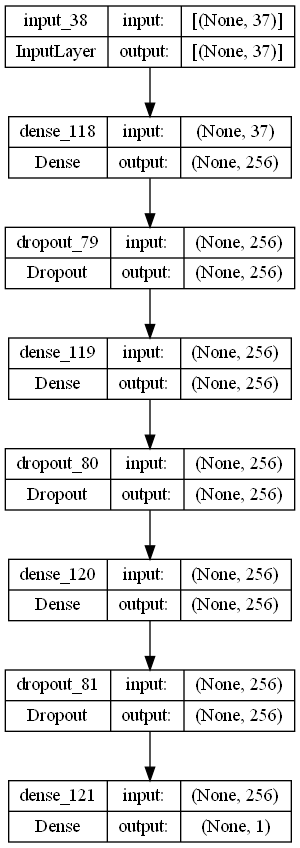

In [41]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model_architecture.png', show_shapes=True)

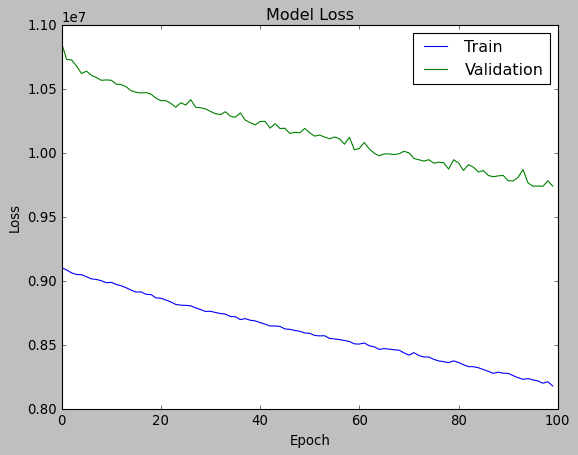

In [47]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

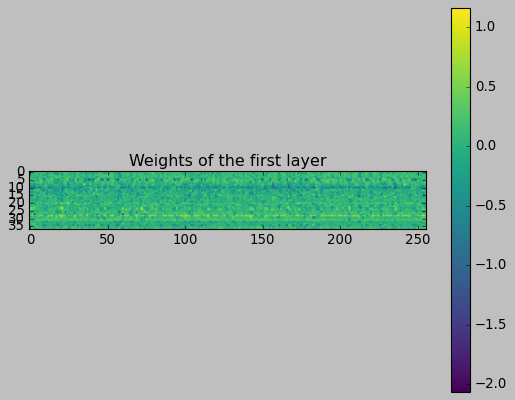

In [48]:
# визуализация весов первого слоя
weights = model.layers[0].get_weights()[0]  # Получение весов первого слоя
plt.imshow(weights, cmap='viridis')
plt.colorbar()
plt.title('Weights of the first layer')
plt.show()

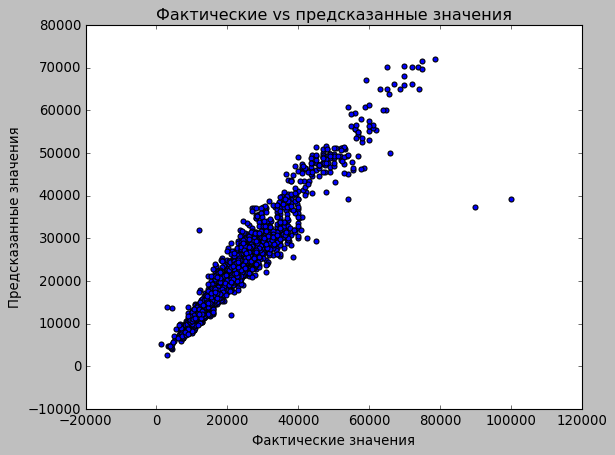

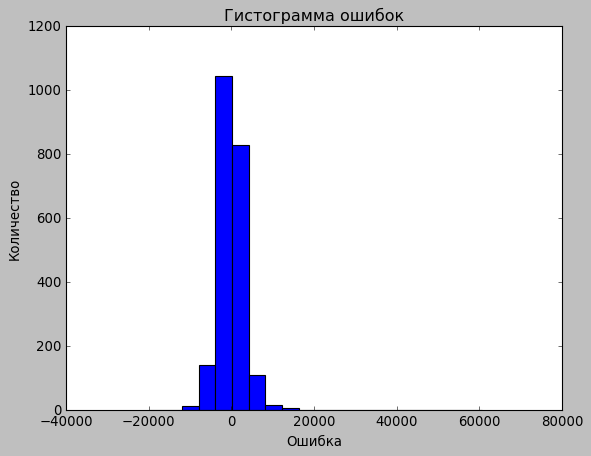

In [50]:
plt.scatter(y_test, y_pred)
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Фактические vs предсказанные значения')
plt.show()

# Гистограмма ошибок
errors = y_test - y_pred
plt.hist(errors, bins=20)
plt.xlabel('Ошибка')
plt.ylabel('Количество')
plt.title('Гистограмма ошибок')
plt.show()

In [54]:
#MAE на тестовой выборке: 1657.32
#Мы добились неплохого результата предсказания, несмотря на ограничеснное количество некоторых моделей машин
#визуализация показывает, что есть несколько серьезных несоответствий, однако это может быть вызвано высокой стоймостью и уникальностью строки с параметрами автомобиля
#Если честно, то становится уже сложнее понять правильно ли я двигаюсь, так как мои знания довольно ограничены 
#Пожалуйста, помогите...
#
#